In [79]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
from APIkey import APIkey, APIpw
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [80]:
#Webscrape https://www.rebellegirls.com/yarnfiber.htm for list of offered brands
url= "https://www.rebellegirls.com/yarnfiber.htm"
page= requests.get(url)

soup=BeautifulSoup(page.content, "html.parser")
results=soup.find(id="accordion")
   
#used ChatGPT to figure out this block of webscraping code
stock=[]
name=[]
brands = soup.find_all('h3')
for brand in brands:
    brand_name = brand.text.strip()
    yarn_list = brand.find_next('div').find_all('li')
    for yarn in yarn_list:
        yarn_name = yarn.text.strip()
        name.append(yarn_name)
        stock.append(brand_name)


In [81]:
#create dataframe of Local Yarn Shop (LYS) offerings
stock_list={"stock":stock, "name":name}
rebelle=pd.DataFrame(stock_list)

rebelle['Rebelle Stock']=rebelle['stock']+ ' '+ rebelle['name']

rebelle=rebelle.drop(['stock', 'name'], axis=1)
rebelle

#save it into a csv file:
#rebelle.to_csv('rebelle_webscrape.csv', mode='a', index= False, header= True)

,Rebelle Stock
0,Adriafil Knitcol
1,Anzula Breeze
2,Anzula Cloud
3,Anzula Haiku
4,Anzula Lunaris
...,...
125,Add-Ins Firestar
126,Add-Ins Angelina
127,Add-Ins Soffsilk
128,Add-Ins Silk Cocoons


In [82]:
#Read in the csv file, created from webscraping the Rebelle website
rebelle=pd.read_csv('rebelle_webscrape.csv')
rebelle

,Rebelle Stock
0,Adriafil Knitcol
1,Anzula Breeze
2,Anzula Cloud
3,Anzula Haiku
4,Anzula Lunaris
...,...
125,Add-Ins Firestar
126,Add-Ins Angelina
127,Add-Ins Soffsilk
128,Add-Ins Silk Cocoons


In [83]:
#Cleaning up the data, by creating titles for columns stripping any unnecessary characters

def clean(rebelle) -> pd.DataFrame:
    rebelle.columns= rebelle.columns.str.title()
    rebelle.columns= rebelle.columns.str.strip()

    return rebelle

#fixing spelling errors found in the data
rebelle['Rebelle Stock']=rebelle['Rebelle Stock'].str.replace('Dominon', 'Dominion')
rebelle['Rebelle Stock']=rebelle['Rebelle Stock'].str.replace('2-ply','2 ply')
rebelle['Rebelle Stock']=rebelle['Rebelle Stock'].str.replace('Serentiy', 'Serenity')

rebelle_list= clean(rebelle)
rebelle_list=rebelle.drop_duplicates()

rebelle_list.iloc[15:25]


,Rebelle Stock
15,Cascade 220 Superwash Sport
16,Cascade Avalon
17,Cascade Baby Alpaca Chunky
18,Cascade Eco+
19,Cascade Eco Duo
20,Cascade Eco Wool
21,Cascade Heritage Silk
22,Cascade Highland Duo
23,Cascade Lana d'Oro
24,Cascade Pacific


In [84]:
#read in the csv file created from Ravelry API calls
#(data is currently only first page of API results for each yarn, default is <=100 results)
projects=pd.read_csv('ravelry_api.csv')

In [85]:
#Label each column and see what kind of data we're working with
projects.columns=['free', 'id', 'name', 'permalink', 'personal_attributes', 'first_photo',
       'designer', 'pattern_author', 'pattern_sources', 'yarn']

projects.head

<bound method NDFrame.head of        free      id                       name                  permalink  \
0     False  706936            Puff Stitch Hat          puff-stitch-hat-9   
1      True  650697       Toe-Up Worsted Socks       toe-up-worsted-socks   
2      True   93685  Child's Self-striping Hat   childs-self-striping-hat   
3      True  545271           Best Baby Beanie           best-baby-beanie   
4      True  317207  F193 Baby / Toddler Socks  f193-baby---toddler-socks   
...     ...     ...                        ...                        ...   
7207  False  322261           Equilibrium Cowl           equilibrium-cowl   
7208  False  333631                Urban Hiker                urban-hiker   
7209   True  356335         Garter Rib for Him         garter-rib-for-him   
7210   True  368916           Eco-Stripe scarf           eco-stripe-scarf   
7211   True  400121   Fishtail Lace Slouch Hat   fishtail-lace-slouch-hat   

      personal_attributes                    

In [86]:
#Change this column into a string and then expand each key:value pair into own column
projects['pattern_author']= projects['pattern_author'].astype('str')

new = projects["pattern_author"].str.split(",", n=5, expand=True)


#add desired column back to original df
projects['author']= new[4]


In [87]:
#Cleaning up the data, by creating titles for columns stripping any unnecessary characters

def clean(projects) -> pd.DataFrame:
    projects.columns= projects.columns.str.title()
    projects.columns= projects.columns.str.strip()

    return projects

projects= clean(projects)

In [88]:
#tidying up columns 
projects['Author']=projects['Author'].astype('str')
projects['Author']=projects['Author'].str.strip("'name': '")


projects['Free']=projects['Free'].astype('str')
projects['Free']=projects['Free'].str.replace('False', 'No')
projects['Free']=projects['Free'].str.replace('True', 'Yes')


projects.head(2)

,Free,Id,Name,Permalink,Personal_Attributes,First_Photo,Designer,Pattern_Author,Pattern_Sources,Yarn,Author
0,No,706936,Puff Stitch Hat,puff-stitch-hat-9,NaN,"{'id': 118330077, 'sort_order': 1, 'user_id': ...","{'crochet_pattern_count': 0, 'favorites_count'...","{'crochet_pattern_count': 0, 'favorites_count'...","[{'amazon_rating': None, 'amazon_reviews': Non...",Adriafil Knitcol,Deborah Kah
1,Yes,650697,Toe-Up Worsted Socks,toe-up-worsted-socks,NaN,"{'id': 56297703, 'sort_order': 1, 'user_id': 1...","{'crochet_pattern_count': 0, 'favorites_count'...","{'crochet_pattern_count': 0, 'favorites_count'...","[{'amazon_rating': None, 'amazon_reviews': Non...",Adriafil Knitcol,Colette Retrosi


In [89]:
#drop unwanted columns
projects=projects.drop(['Permalink','Personal_Attributes', 'First_Photo', 'Designer','Pattern_Author', 'Pattern_Sources'], axis=1)

In [90]:
#joined the two datasets together
rebelle_projects= (pd.merge(rebelle_list, projects, left_on= "Rebelle Stock", right_on= "Yarn"))

rebelle_projects.head(2)
rebelle_projects.tail(2)

,Rebelle Stock,Free,Id,Name,Yarn,Author
6882,Zen Yarn Garden Serenity Glitter Sock,No,7286128,Faux Bois Cowl,Zen Yarn Garden Serenity Glitter Sock,Tanis Gray
6883,Zen Yarn Garden Serenity Glitter Sock,No,545389,Michelle Scarf,Zen Yarn Garden Serenity Glitter Sock,Katie Remp


In [91]:
#confirming I wasn't missing any pieces of data 
print(rebelle_projects.isnull().any().any())

False


In [92]:
#looked to see how large new dataset is
rebelle_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rebelle Stock  6884 non-null   object
 1   Free           6884 non-null   object
 2   Id             6884 non-null   int64 
 3   Name           6884 non-null   object
 4   Yarn           6884 non-null   object
 5   Author         6884 non-null   object
dtypes: int64(1), object(5)
memory usage: 322.8+ KB


In [ ]:
#looked to see what data from Rebelle's website didn't have any API information 
#a bit suspcious about there were NO results for top 10 lines, leaving it currently for time's sake
difference= rebelle[~rebelle['Rebelle Stock'].isin(rebelle_projects['Yarn'])]
print(difference)

                                         Rebelle Stock
23                                  Cascade Lana d'Oro
29                           Cestari Traditional 2 ply
30                                Collinette Jitterbug
31                             Elsbeth Lavold Hempathy
32                        Feederbrook Farms Entropy DK
46                           Knit Collage Sampler Kits
50                Knitted Wit Sassy Holidays Sock Club
54                                       Mad Tosh ASAP
73                                      Malabrigo Sock
75                                   Malabrigo Worsted
108             Dyed and Undyed Wool Combed Top Merino
109              Dyed and Undyed Wool Combed Top Jacob
110           Dyed and Undyed Wool Combed Top Shetland
111          Dyed and Undyed Wool Combed Top Portugese
112           Dyed and Undyed Wool Combed Top Falkland
113  Dyed and Undyed Wool Combed Top Blue Faced Lei...
114            Dyed and Undyed Wool Combed Top Targhee
115       

In [94]:
#Were there patterns that have multiple yarn options?
rebelle_projects["Name"].value_counts()

Name
Violet Waffles           6
Granger Toque            5
Inside Cat               5
The Resurgence Beanie    4
Nuptse                   4
                        ..
Enter Entropy            1
Third Winter             1
He Said, She Said        1
Crescent City            1
Michelle Scarf           1
Name: count, Length: 6269, dtype: int64

In [95]:
#This pattern had the most yarn options, what are the options?
rebelle_projects[rebelle_projects['Name']=='Violet Waffles']

,Rebelle Stock,Free,Id,Name,Yarn,Author
1069,Cascade 220,No,444481,Violet Waffles,Cascade 220,Halldora J
3528,Mad Tosh Prairie,No,444481,Violet Waffles,Mad Tosh Prairie,Halldora J
3839,Mad Tosh Vintage,No,444481,Violet Waffles,Mad Tosh Vintage,Halldora J
3934,Malabrigo Arroyo,No,444481,Violet Waffles,Malabrigo Arroyo,Halldora J
4843,Malabrigo Rastita,No,444481,Violet Waffles,Malabrigo Rastita,Halldora J
5026,Malabrigo Rios,No,444481,Violet Waffles,Malabrigo Rios,Halldora J


In [96]:
#How many of the patterns are available for free?
free_count= rebelle_projects["Free"].value_counts()
free_count

Free
No     5482
Yes    1402
Name: count, dtype: int64

In [97]:
#sorting patterns into free or for purchase
free_patterns= pd.DataFrame(rebelle_projects[rebelle_projects['Free']== 'Yes'])
paid_patterns= pd.DataFrame(rebelle_projects[rebelle_projects['Free']== 'No'])

free_patterns

,Rebelle Stock,Free,Id,Name,Yarn,Author
1,Adriafil Knitcol,Yes,650697,Toe-Up Worsted Socks,Adriafil Knitcol,Colette Retrosi
2,Adriafil Knitcol,Yes,93685,Child's Self-striping Hat,Adriafil Knitcol,Janet D. Russell
3,Adriafil Knitcol,Yes,545271,Best Baby Beanie,Adriafil Knitcol,Danielle Meyer
4,Adriafil Knitcol,Yes,317207,F193 Baby / Toddler Socks,Adriafil Knitcol,JoAnne Turcott
5,Adriafil Knitcol,Yes,692550,Zippy,Adriafil Knitcol,Marji LaFrenier
...,...,...,...,...,...,...
6781,Zen Yarn Garden Serenity 20,Yes,779537,Convergence Wrap,Zen Yarn Garden Serenity 20,Shaina Bilow
6798,Zen Yarn Garden Serenity 20,Yes,228750,Hathor Socks,Zen Yarn Garden Serenity 20,Carol Baird
6815,Zen Yarn Garden Serenity 20,Yes,322463,taking wing,Zen Yarn Garden Serenity 20,Elizabeth Fallo
6850,Zen Yarn Garden Serenity 20,Yes,609675,Yinzer Cowl,Zen Yarn Garden Serenity 20,Susan Dittrich


In [98]:
#Which yarn has multiple patterns available for free?
paid_yarn=pd.DataFrame(paid_patterns['Rebelle Stock'].value_counts())
paid_yarn
free_yarn= pd.DataFrame(free_patterns['Rebelle Stock'].value_counts())

print(free_yarn)

                                       count
Rebelle Stock                               
Cascade Pacific                           57
Noro Kureyon                              52
Koigu KPPPM                               46
Cascade 128 Superwash                     44
Adriafil Knitcol                          39
...                                      ...
Juniper Moon Zooey DK                      1
Knitted Wit Victory Fingering              1
Yarn Rehab Silk Traveler                   1
Anzula Wash My Lace                        1
Zen Yarn Garden Serenity Glitter Sock      1

[89 rows x 1 columns]


In [108]:
#Merged the two dataframes back into one
yarn_sorted=free_yarn.merge(paid_yarn, on='Rebelle Stock', how= 'outer')
yarn_sorted['count_x']=yarn_sorted['count_x'].fillna(0)
yarn_sorted['count_y']=yarn_sorted['count_y'].fillna(0)

yarn_sorted['count_x']=yarn_sorted['count_x'].astype(int)
yarn_sorted.columns=['Yes', 'No']
yarn_sorted.tail(10)

,Yes,No
Rebelle Stock,,
Urth Yarns Uneek Cotton,0,2
Urth Yarns Uneek Sock,0,26
Wonderland Yarns Cheshire Cat Gradient Packs,12,88
Wonderland Yarns Mad Hatter Gradient Packs,13,87
Wonderland Yarns Queen of Hearts Gradient Packs,4,27
Yarn Rehab Rockshelter Sock,5,16
Yarn Rehab Silk Traveler,1,5
Zen Yarn Garden Serenity 20,8,92
Zen Yarn Garden Serenity Glitter Sock,1,23


In [100]:
#If I like a certain Author's style, did they write multiple patterns?
author_count=rebelle_projects['Author'].value_counts()

author_count.head()

Author
Plymouth Yarn Design Studio    85
Susan Ashcroft                 77
Taiga Hilliard                 65
Cheryl Kubat                   43
Louisa Harding                 36
Name: count, dtype: int64

In [101]:
#What authors wrote multiple free patterns?
author_count=pd.DataFrame(free_patterns['Author'].value_counts())
author_count.columns=['Count']
author_count

,Count
Author,
Purl Soho,27
"""Alice's Embrace""",22
Shannon Dunbabi,22
Susan Ashcroft,19
Vanessa Ewing,17
...,...
KnittedKnockers.org,1
Towering Knits,1
Claudia Barbo and Jennifer Taylor,1


In [102]:
#Add the pattern count back to the free pattern data, and sort by pattern count in ascending order
author_value=free_patterns.merge(author_count, on='Author', how= 'outer')
author_sorted= author_value[author_value['Count']>1]
author_sorted.sort_values("Count")



,Rebelle Stock,Free,Id,Name,Yarn,Author,Count
1401,Malabrigo Rastita,Yes,518107,Twist Again,Malabrigo Rastita,Ágnes Kutas,2
491,Malabrigo Lace,Yes,154236,Citron,Malabrigo Lace,Hilary Smith Callis,2
490,Anzula Cloud,Yes,477252,Anthi,Anzula Cloud,Hilary Smith Callis,2
475,Cascade 220,Yes,7288409,Santa Stocking Hat,Cascade 220,Heather Pelletier,2
474,Cascade 128 Superwash,Yes,1196747,Faux Fur Santa Hat,Cascade 128 Superwash,Heather Pelletier,2
...,...,...,...,...,...,...,...
1036,Koigu KPPPM,Yes,24402,Purl Beret,Koigu KPPPM,Purl Soho,27
1037,Ozark Handspun Ozark Handspun,Yes,52144,Whit’s Knits: Mood Pillow,Ozark Handspun Ozark Handspun,Purl Soho,27
1038,Spud and Chloe Sweater,Yes,133414,Bulky Baby Blankets,Spud and Chloe Sweater,Purl Soho,27
1024,Blue Sky Fibers Worsted Cotton,Yes,267731,Chevron Baby Blanket,Blue Sky Fibers Worsted Cotton,Purl Soho,27


<Axes: title={'center': 'Is the Pattern available for Free?'}, ylabel='count'>

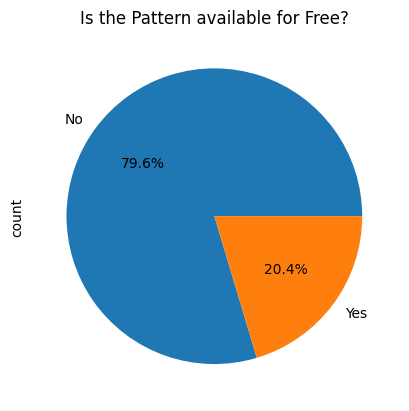

In [103]:
#Pie chart showing percentage of patterns available for free
plt.title('Is the Pattern available for Free?')

free_count.plot(kind='pie', autopct= '%1.1f%%')


Text(0.5, 1.0, 'Is the Pattern Available for Free, sorted by Yarn')

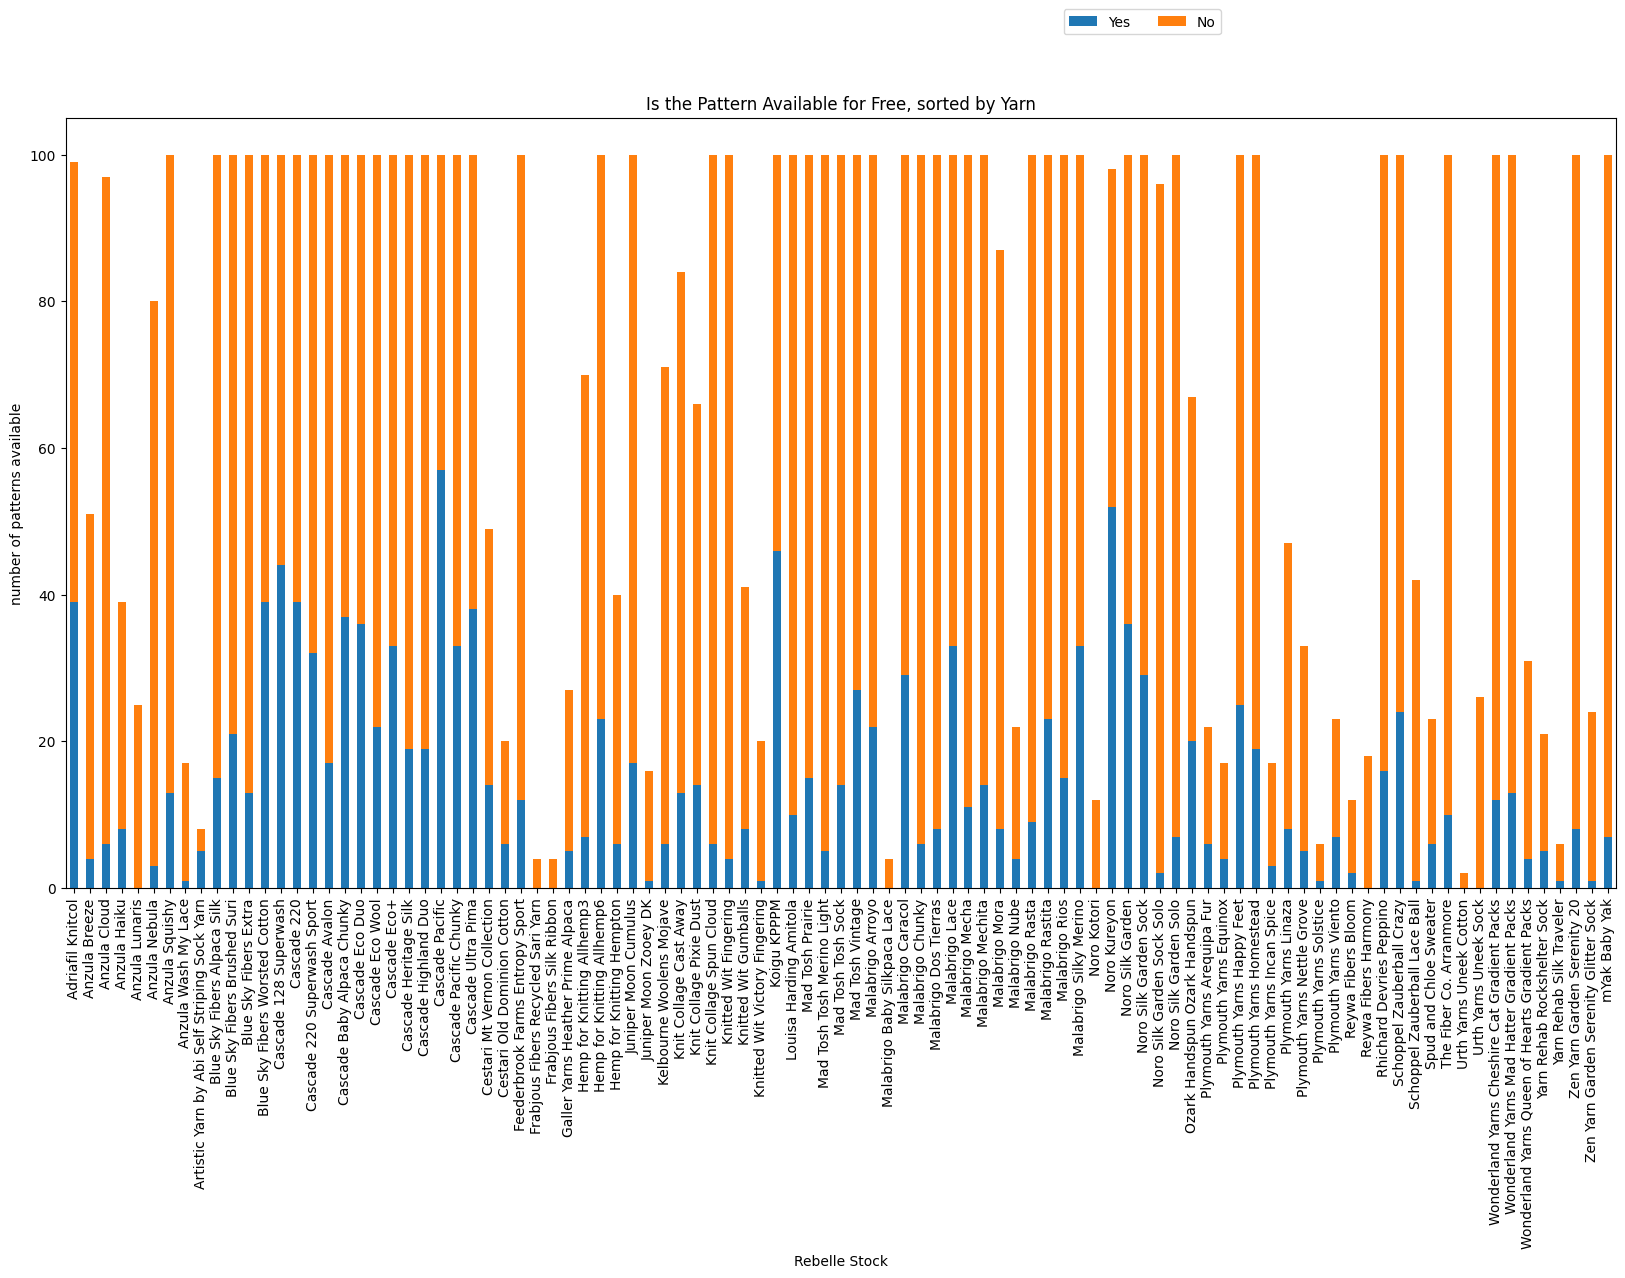

In [104]:
#bar chart showing patterns available by yarn, sorted by availability
yarn_sorted.plot(kind='bar', stacked=True, figsize=(20,10)).set(ylabel='number of patterns available')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.title('Is the Pattern Available for Free, sorted by Yarn')

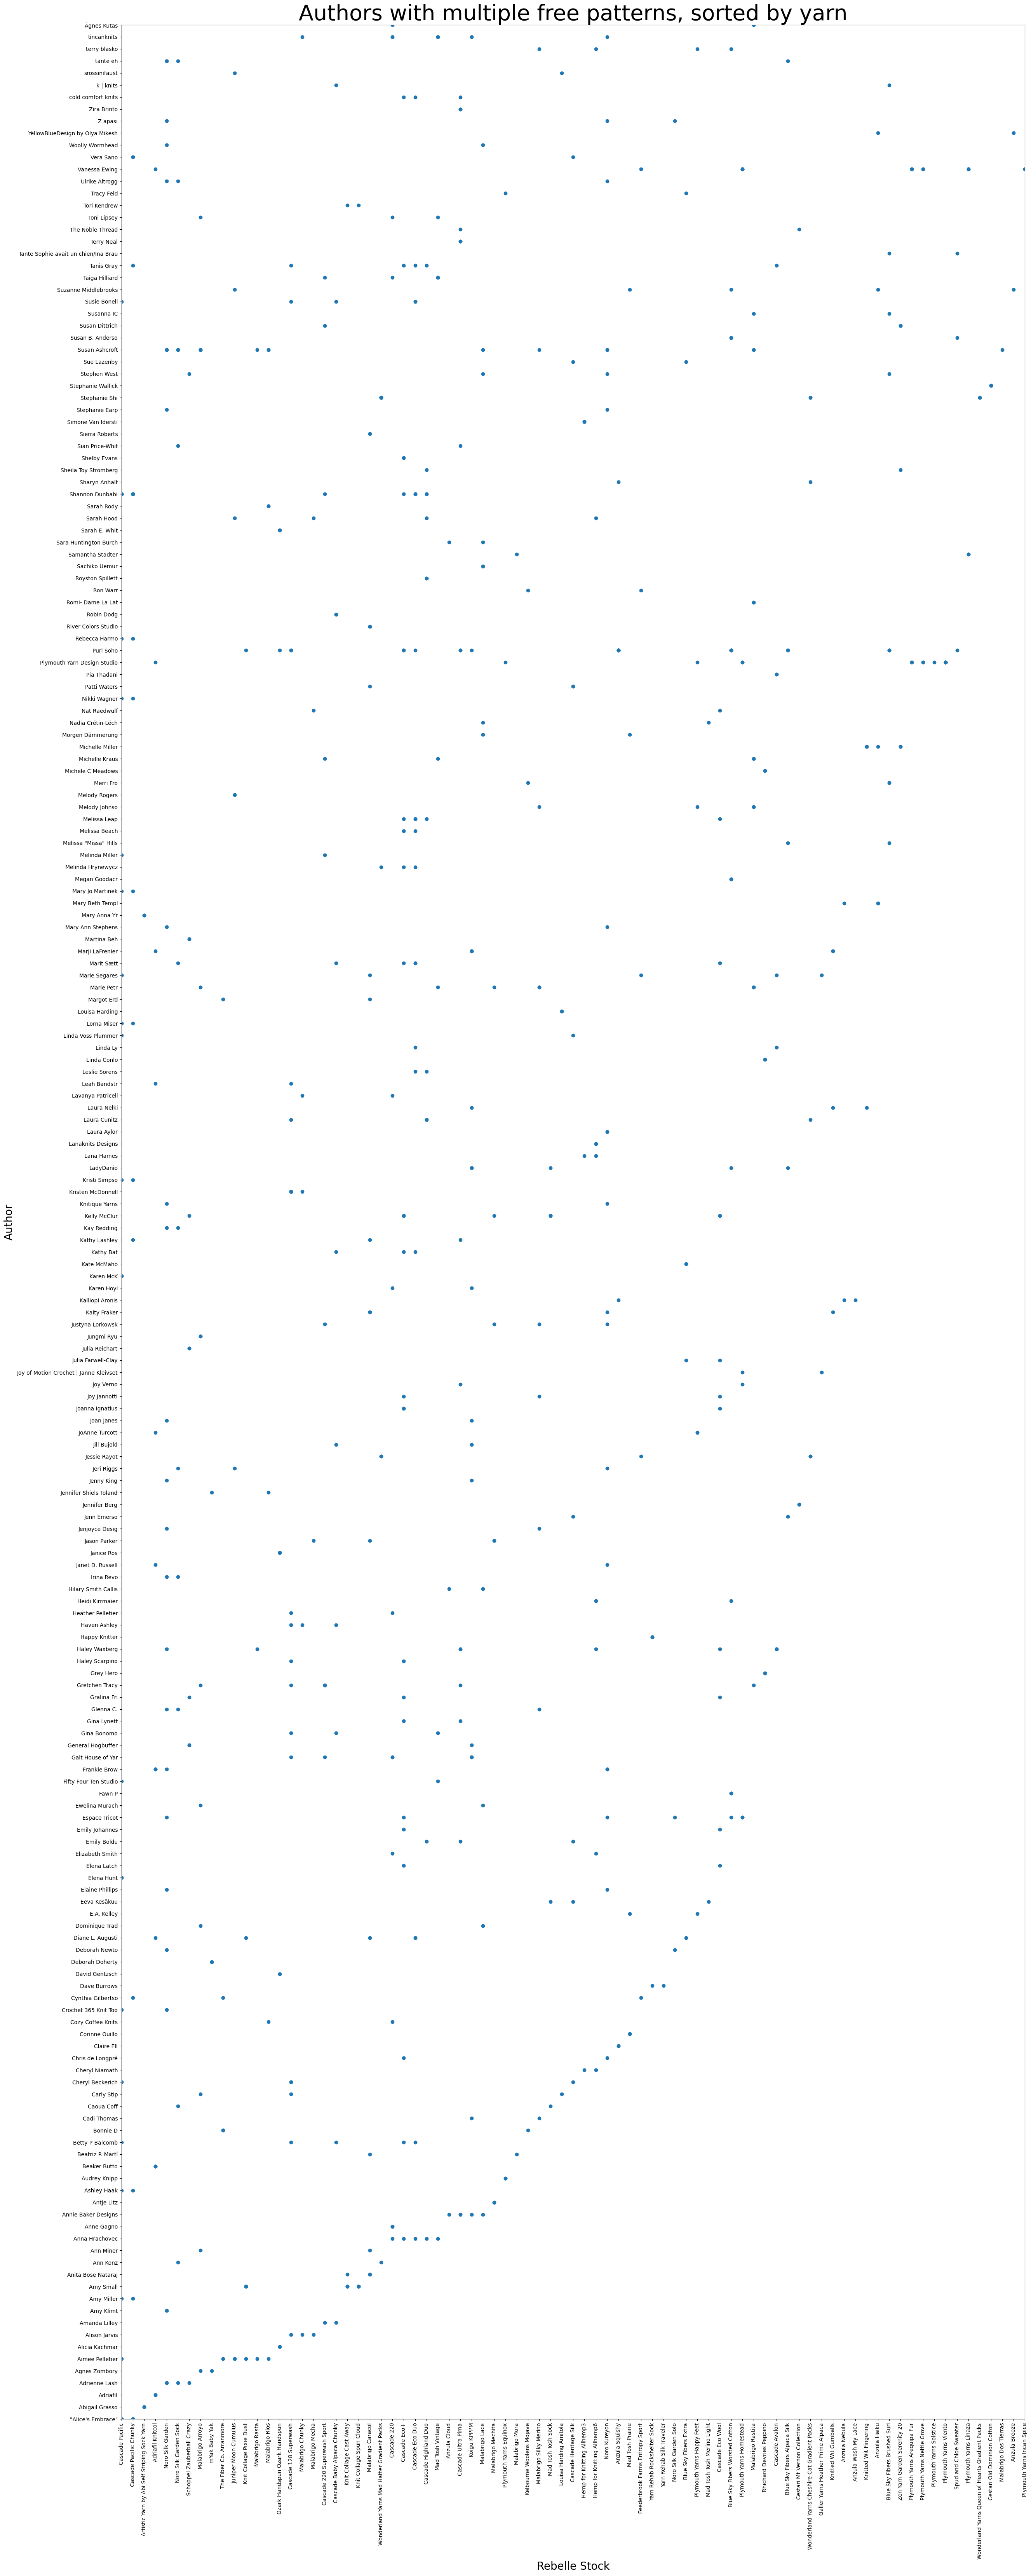

In [107]:
#Scatter plot showing whether authors of free patterns wrote for multiple yarns
plt.figure(figsize=(30, 80))

plt.xlabel('Rebelle Stock', fontsize=20) 
plt.ylabel('Author', fontsize=20)
plt.title("Authors with multiple free patterns, sorted by yarn", fontsize=40)

plt.tick_params(axis='x', labelrotation = 90)
plt.autoscale(enable=True, axis='both', tight=True)

x= author_sorted['Rebelle Stock']
y= author_sorted['Author']

plt.scatter(x,y)

plt.show()